<a href="https://colab.research.google.com/github/rkkapali/steamgamesdataset/blob/main/games_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

“What factors (e.g., Price, Achievements) predict average playtime?”
“Can we predict if a game will be a hit based on these features?”

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
print("Ready to go!")

Ready to go!


In [78]:
file_path = '/content/games.csv'
df = pd.read_csv(file_path)

In [79]:
# Display the first few rows to understand the data
print("Initial Dataset Preview:")
print(df.head())
print("\nDataset Info:")
print(df.info())

Initial Dataset Preview:
                   AppID          Name Release date  Estimated owners  \
0       Galactic Bowling  Oct 21, 2008    0 - 20000               0.0   
1           Train Bandit  Oct 12, 2017    0 - 20000               0.0   
2           Jolt Project  Nov 17, 2021    0 - 20000               0.0   
3               Henosis™  Jul 23, 2020    0 - 20000               0.0   
4  Two Weeks in Painland   Feb 3, 2020    0 - 20000               0.0   

   Peak CCU  Required age  Price  DiscountDLC count  \
0       0.0         19.99    0.0                  0   
1       0.0          0.99    0.0                  0   
2       0.0          4.99    0.0                  0   
3       0.0          5.99    0.0                  0   
4       0.0          0.00    0.0                  0   

                                      About the game  \
0  Galactic Bowling is an exaggerated and stylize...   
1  THE LAW!! Looks to be a showdown atop a train....   
2  Jolt Project: The army now has a n

In [80]:
# Basic statistics
print("\nBasic Statistics:")
print(df.describe())

# Checking for missing values
print("\nMissing Values:")
print(df.isnull().sum())

pd.set_option('display.max_columns', None)


Basic Statistics:
       Estimated owners      Peak CCU  Required age    Price  \
count      9.741000e+04  97410.000000  97410.000000  97410.0   
mean       1.267090e-04      0.013452      7.086262      0.0   
std        5.985601e-03      0.102109     12.387782      0.0   
min        0.000000e+00      0.000000      0.000000      0.0   
25%        0.000000e+00      0.000000      0.990000      0.0   
50%        0.000000e+00      0.000000      4.190000      0.0   
75%        7.786537e-07      0.000000      9.990000      0.0   
max        1.000000e+00      1.000000    999.980000      0.0   

       DiscountDLC count  Metacritic score    User score      Positive  \
count       97410.000000      97410.000000  97410.000000  9.741000e+04   
mean            0.493081          0.030507      0.034791  8.489366e+02   
std            12.832834          0.149953      1.674105  2.287011e+04   
min             0.000000          0.000000      0.000000  0.000000e+00   
25%             0.000000          

In [81]:
# Display all column names
print("Column Names in the Dataset:")
print(df.columns.tolist())

Column Names in the Dataset:
['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'Price', 'DiscountDLC count', 'About the game', 'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score', 'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Notes', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies', '360 Video', 'Accounting', 'Action', 'Adventure', 'Animation & Modeling', 'Audio Production', 'Casual', 'Design & Illustration', 'Documentary', 'Early Access', 'Education', 'Episodic', 'Free To Play', 'Free to Play', 'Game Development', 'Gore', 'Indie', 'Massively Multiplayer', 'Movie', 'Nudity', 'Photo Editing', 'RPG', 'Racing', 'Sexual Content', 'Short', 'Simu

In [82]:
# Step 1: Initial Data Exploration
print("Dataset Shape:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Shape: (97410, 75)

Column Names:
 ['AppID', 'Name', 'Release date', 'Estimated owners', 'Peak CCU', 'Required age', 'Price', 'DiscountDLC count', 'About the game', 'Supported languages', 'Full audio languages', 'Reviews', 'Header image', 'Website', 'Support url', 'Support email', 'Windows', 'Mac', 'Linux', 'Metacritic score', 'Metacritic url', 'User score', 'Positive', 'Negative', 'Score rank', 'Achievements', 'Recommendations', 'Notes', 'Average playtime forever', 'Average playtime two weeks', 'Median playtime forever', 'Median playtime two weeks', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags', 'Screenshots', 'Movies', '360 Video', 'Accounting', 'Action', 'Adventure', 'Animation & Modeling', 'Audio Production', 'Casual', 'Design & Illustration', 'Documentary', 'Early Access', 'Education', 'Episodic', 'Free To Play', 'Free to Play', 'Game Development', 'Gore', 'Indie', 'Massively Multiplayer', 'Movie', 'Nudity', 'Photo Editing', 'RPG', 'Racing', 'Sexual Content', 

In [83]:
# ensuring that X and y are properly aligned DataFrames/Series
X = pd.DataFrame(X).reset_index(drop=True)
y = pd.Series(y).reset_index(drop=True)

In [84]:
# Drop irrelevant columns (e.g., URLs, images, notes) that won't aid retention/success analysis
columns_to_drop = ['AppID', 'Header image', 'Website', 'Support url', 'Support email',
                   'Metacritic url', 'Screenshots', 'Movies', 'Notes', 'About the game']
df_cleaned = df.drop(columns=columns_to_drop)

In [85]:
# Convert 'Estimated owners' (range like '0 - 20000') to numeric midpoint
def parse_owners(owners_str):
    if isinstance(owners_str, str) and '-' in owners_str:
        low, high = map(int, owners_str.split(' - '))
        return (low + high) / 2
    return np.nan

df_cleaned['Estimated owners'] = df_cleaned['Estimated owners'].apply(parse_owners)

In [122]:
# Handle missing values
df_cleaned['Metacritic score'] = df_cleaned['Metacritic score'].fillna(df_cleaned.groupby('Genres')['Metacritic score'].transform('mean'))
df_cleaned['Metacritic score'] = df_cleaned['Metacritic score'].fillna(df_cleaned['Metacritic score'].mean())
df_cleaned['Reviews'] = df_cleaned['Reviews'].fillna('No reviews')
df_cleaned['Average playtime forever'] = df_cleaned['Average playtime forever'].fillna(0)  # Assume 0 playtime if missing
df_cleaned['Estimated owners'] = df_cleaned['Estimated owners'].fillna(df_cleaned['Estimated owners'].median())
df_cleaned['Peak CCU'] = df_cleaned['Peak CCU'].fillna(0)  # Assume 0 if missing
df_cleaned['Price'] = df_cleaned['Price'].fillna(df_cleaned['Price'].median())

In [123]:
# Fill missing Metacritic scores with genre-based averages (if sparse, drop later if needed)
df_cleaned['Metacritic score'] = df_cleaned.groupby('Genres')['Metacritic score'].transform(lambda x: x.fillna(x.mean()))
df_cleaned['Metacritic score'].fillna(df_cleaned['Metacritic score'].mean(), inplace=True)

<ipython-input-123-b5edcaf184ea>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Metacritic score'].fillna(df_cleaned['Metacritic score'].mean(), inplace=True)


In [88]:
df_cleaned['Reviews'].fillna('No reviews', inplace=True)

<ipython-input-88-fed84fd57c24>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Reviews'].fillna('No reviews', inplace=True)


In [124]:
# Only drop rows where ALL specified columns are NaN, not just one
df_cleaned = df.dropna(subset=['Average playtime forever', 'Estimated owners'], how='all')

In [125]:
# After your cleaning steps but before normalization, add these checks
print("Shape of df_cleaned after cleaning:", df_cleaned.shape)
print("Missing values in numerical_cols:\n", df_cleaned[numerical_cols].isnull().sum())
print("Sample of df_cleaned:\n", df_cleaned[numerical_cols].head())

Shape of df_cleaned after cleaning: (97410, 75)
Missing values in numerical_cols:
 Average playtime forever    0
Price                       0
Estimated owners            0
Peak CCU                    0
Metacritic score            0
dtype: int64
Sample of df_cleaned:
    Average playtime forever  Price  Estimated owners  Peak CCU  \
0                       0.0    0.0               0.0       0.0   
1                       0.0    0.0               0.0       0.0   
2                       0.0    0.0               0.0       0.0   
3                       0.0    0.0               0.0       0.0   
4                       0.0    0.0               0.0       0.0   

   Metacritic score  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  


In [126]:
# Normalize numerical features (playtime, price, owners)
scaler = MinMaxScaler()
numerical_cols = ['Average playtime forever', 'Price', 'Estimated owners', 'Peak CCU', 'Metacritic score']

# Only proceed if there’s data
if df_cleaned.shape[0] > 0:
    df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])
    print("Normalization successful!")
else:
    print("Error: df_cleaned is empty. No rows available for normalization.")

Normalization successful!


In [127]:
# One-hot encode Genres (split multi-genre entries)
df_cleaned['Genres'] = df_cleaned['Genres'].fillna('Unknown')
genres_expanded = df_cleaned['Genres'].str.get_dummies(sep=',')
df_cleaned = pd.concat([df_cleaned, genres_expanded], axis=1)

In [129]:
# Feature Engineering
df_cleaned['Price_to_Playtime'] = df_cleaned['Price'] / (df_cleaned['Average playtime forever'] + 1e-6)

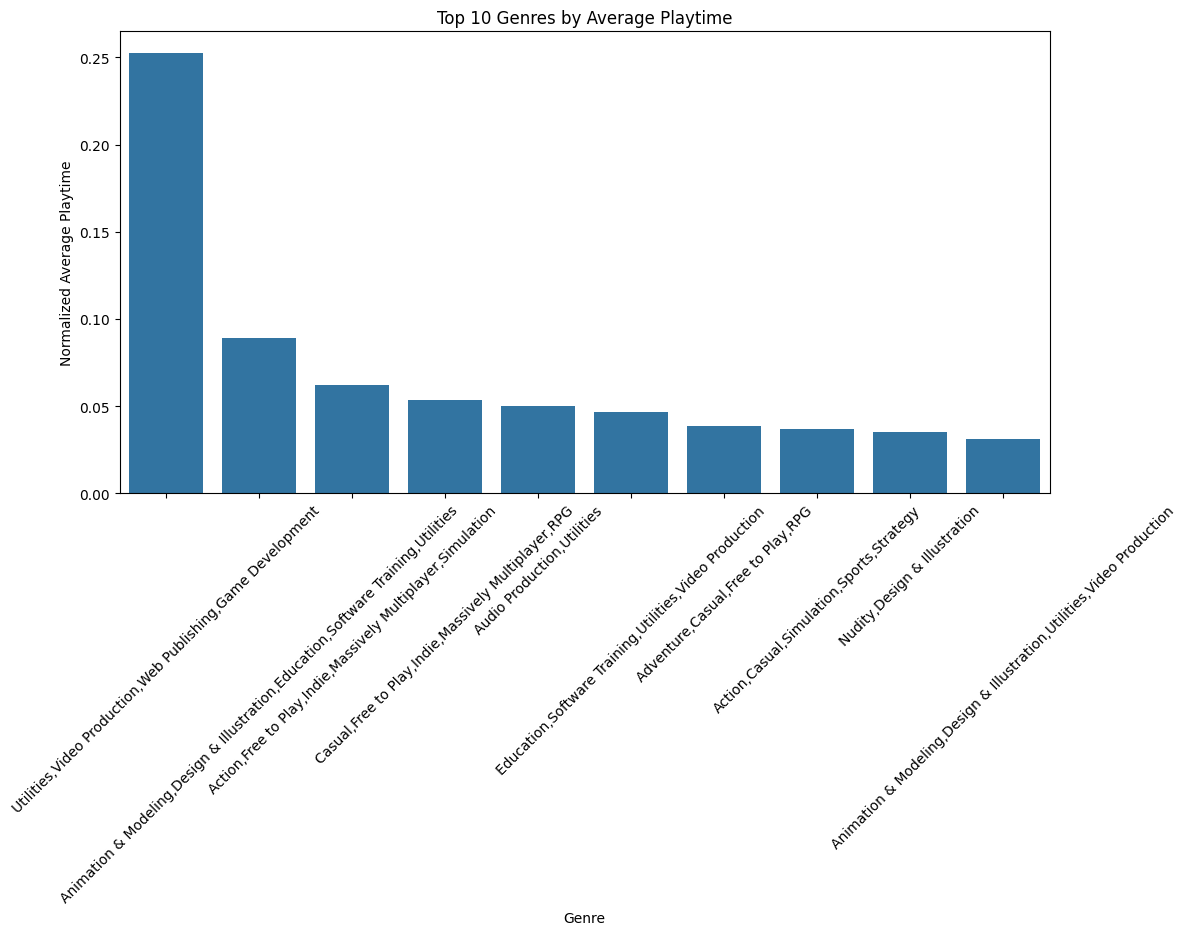

In [130]:
# Playtime by Genre
genre_playtime = df_cleaned.groupby('Genres')['Average playtime forever'].mean().sort_values(ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_playtime.index, y=genre_playtime.values)
plt.xticks(rotation=45)
plt.title('Top 10 Genres by Average Playtime')
plt.xlabel('Genre')
plt.ylabel('Normalized Average Playtime')
plt.show()

/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation between Price and Peak CCU: nan


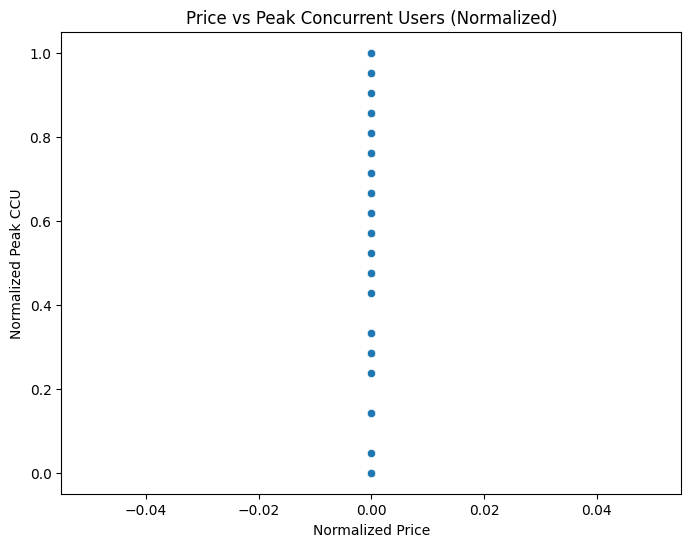

In [131]:
# Price vs Peak CCU Correlation
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Peak CCU', data=df_cleaned)
plt.title('Price vs Peak Concurrent Users (Normalized)')
plt.xlabel('Normalized Price')
plt.ylabel('Normalized Peak CCU')
correlation = df_cleaned['Price'].corr(df_cleaned['Peak CCU'])
print(f"Correlation between Price and Peak CCU: {correlation:.2f}")

In [132]:
# Add a price-to-playtime ratio
df_cleaned['Price_to_Playtime'] = df_cleaned['Price'] / (df_cleaned['Average playtime forever'] + 1e-6)  # Avoid division by zero

In [133]:
# Features: Price, Metacritic score, and top genres
features = ['Price', 'Metacritic score'] + genres_expanded.columns.tolist()
X = df_cleaned[features]
y = df_cleaned['Average playtime forever']

In [134]:
print("\nStatistical Summary of Numerical Features:")
stats = df_cleaned[numerical_cols + ['Price_to_Playtime']].describe()
print(stats)
print("\nVariance of Numerical Features:")
print(df_cleaned[numerical_cols + ['Price_to_Playtime']].var())


Statistical Summary of Numerical Features:
       Average playtime forever    Price  Estimated owners      Peak CCU  \
count              97410.000000  97410.0      9.741000e+04  97410.000000   
mean                   0.000630      0.0      1.267090e-04      0.013452   
std                    0.007332      0.0      5.985601e-03      0.102109   
min                    0.000000      0.0      0.000000e+00      0.000000   
25%                    0.000000      0.0      0.000000e+00      0.000000   
50%                    0.000000      0.0      0.000000e+00      0.000000   
75%                    0.000000      0.0      7.786537e-07      0.000000   
max                    1.000000      0.0      1.000000e+00      1.000000   

       Metacritic score  Price_to_Playtime  
count      97410.000000            97410.0  
mean           0.030507                0.0  
std            0.149953                0.0  
min            0.000000                0.0  
25%            0.000000                0.0  
5

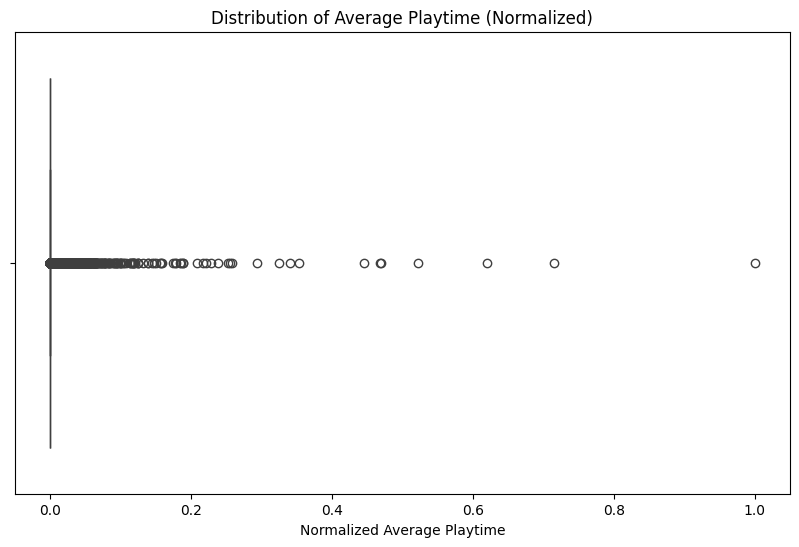

In [136]:
# Visualization 2: Boxplot of playtime distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_cleaned['Average playtime forever'])
plt.title('Distribution of Average Playtime (Normalized)')
plt.xlabel('Normalized Average Playtime')
plt.show()

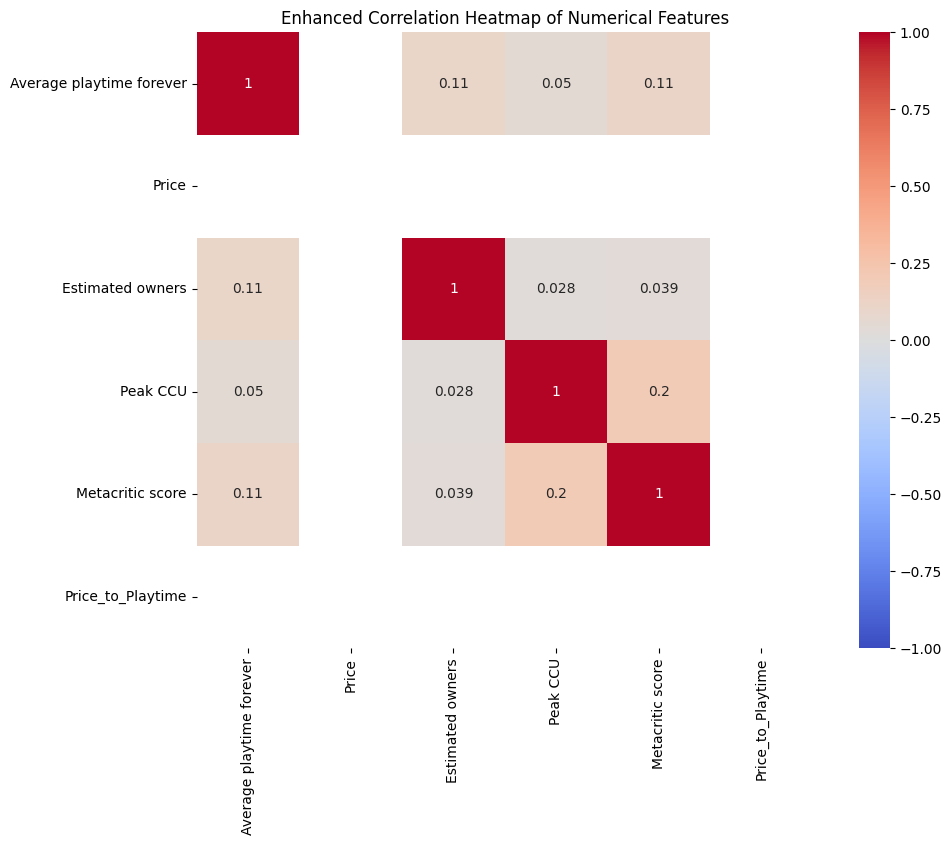

In [137]:
# Visualization 3: Enhanced Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned[numerical_cols + ['Price_to_Playtime']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True)
plt.title('Enhanced Correlation Heatmap of Numerical Features')
plt.show()

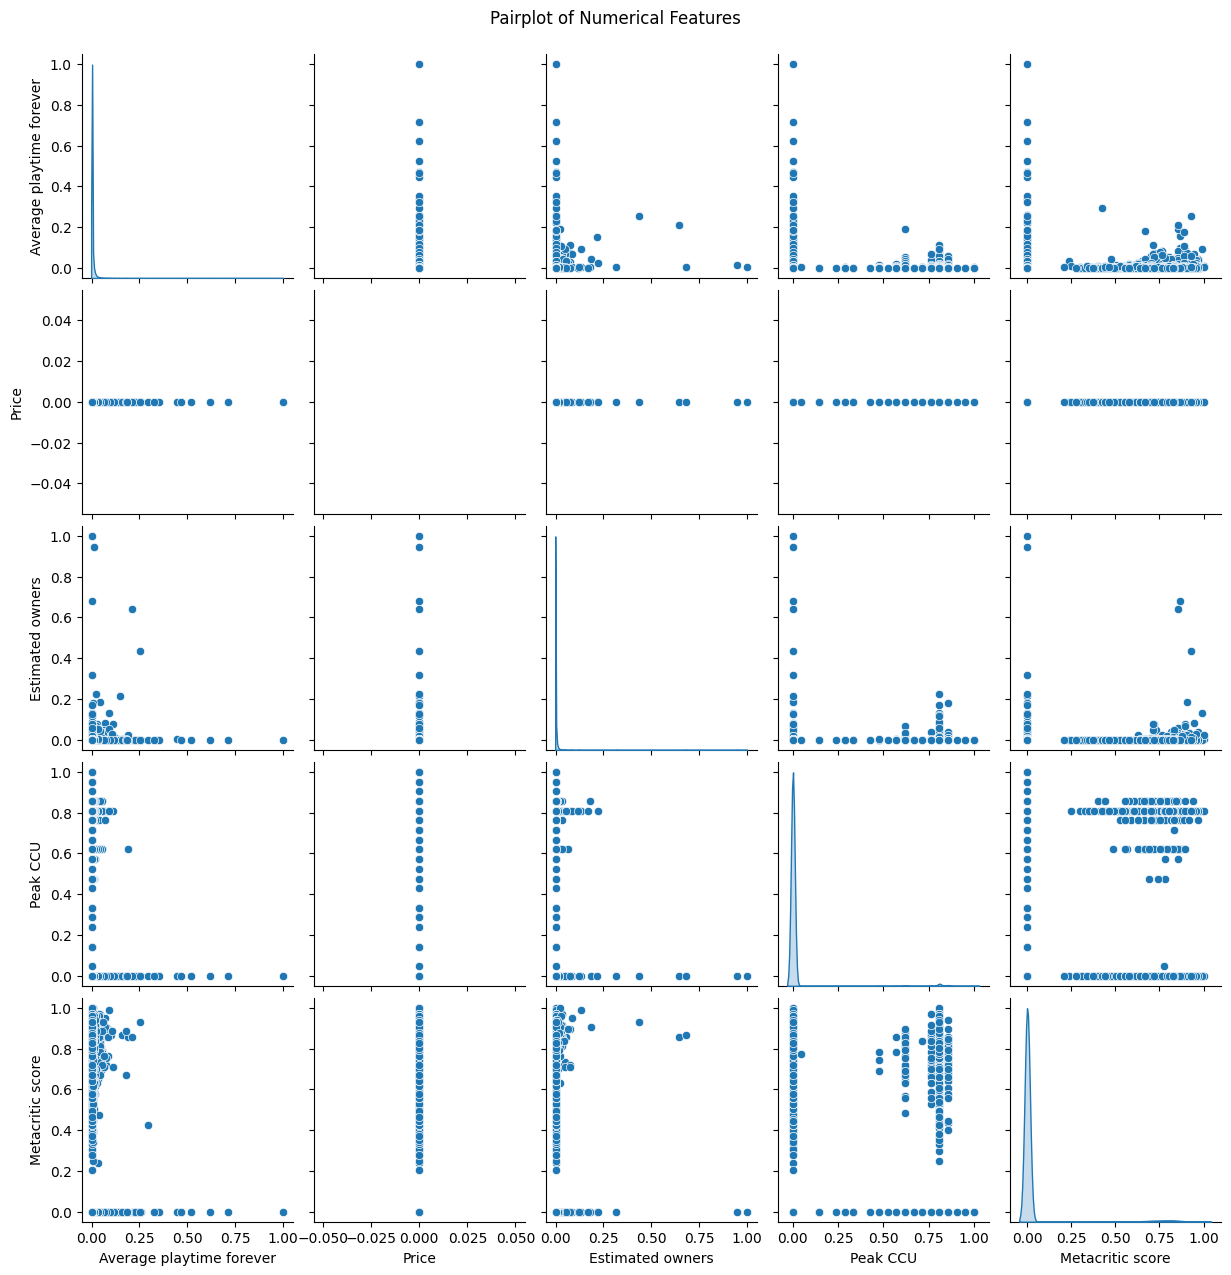

In [138]:
# Visualization 4: Pairplot of key features
sns.pairplot(df_cleaned[numerical_cols], diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

In [139]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [141]:
# Predict and evaluate
y_pred = model.predict(X_test)
print("\nLinear Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R^2 Score: {r2_score(y_test, y_pred):.4f}")


Linear Regression Results:
Mean Squared Error: 0.0000
R^2 Score: 0.0194


In [142]:
# Model 2: Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)
print("\nRandom Forest Results:")
print(f"Mean Squared Error: {rf_mse:.4f}")
print(f"R^2 Score: {rf_r2:.4f}")


Random Forest Results:
Mean Squared Error: 0.0001
R^2 Score: -0.0452


In [143]:
# Model 3: K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)
print("\nKNN Results:")
print(f"Mean Squared Error: {knn_mse:.4f}")
print(f"R^2 Score: {knn_r2:.4f}")


KNN Results:
Mean Squared Error: 0.0001
R^2 Score: -0.0483


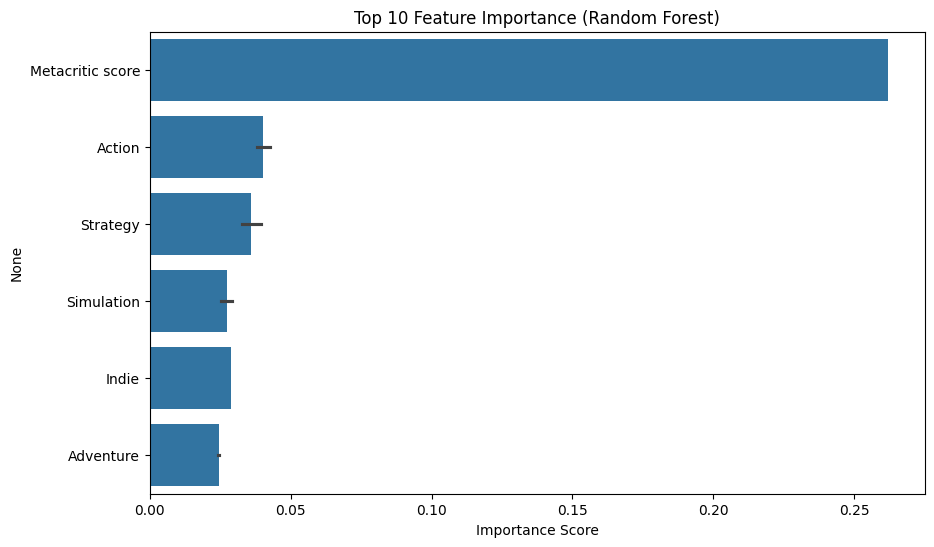

In [144]:
# Feature importance from Random Forest
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title('Top 10 Feature Importance (Random Forest)')
plt.xlabel('Importance Score')
plt.show()

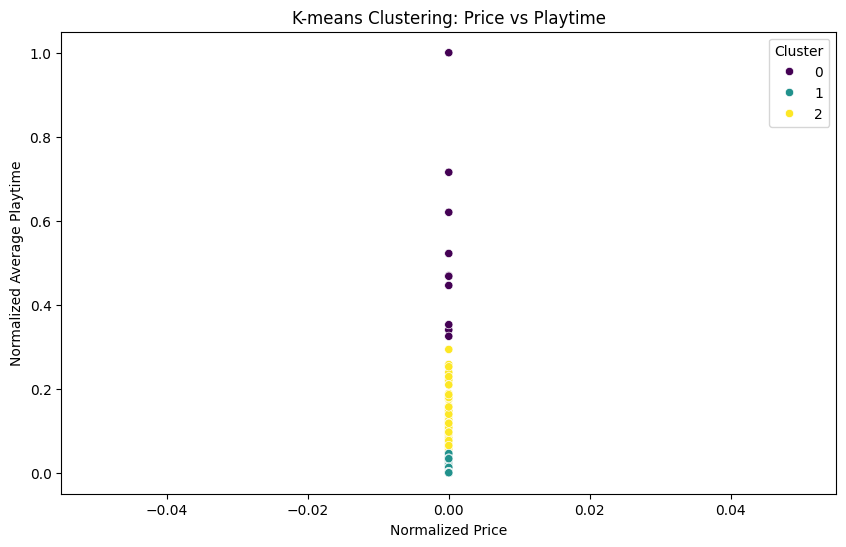

In [145]:
# Step 5: Bonus Visualization - Clustering with K-means
kmeans_data = df_cleaned[['Average playtime forever', 'Price']]
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(kmeans_data)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Average playtime forever', hue='Cluster', data=df_cleaned, palette='viridis')
plt.title('K-means Clustering: Price vs Playtime')
plt.xlabel('Normalized Price')
plt.ylabel('Normalized Average Playtime')
plt.show()

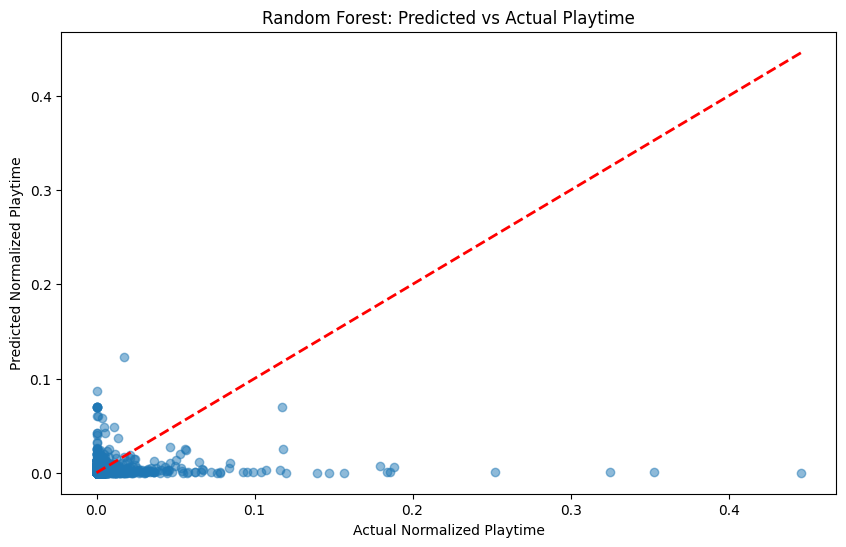

In [146]:
# Visualization 7: Prediction vs Actual Plot for Random Forest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Random Forest: Predicted vs Actual Playtime')
plt.xlabel('Actual Normalized Playtime')
plt.ylabel('Predicted Normalized Playtime')
plt.show()

In [147]:
print("Playtime Stats:", df_cleaned['Average playtime forever'].describe())
print("Variance:", df_cleaned['Average playtime forever'].var())

Playtime Stats: count    97410.000000
mean         0.000630
std          0.007332
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Average playtime forever, dtype: float64
Variance: 5.376069579496223e-05


In [148]:
from sklearn.model_selection import cross_val_score
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print("Random Forest Cross-Validation R²:", rf_cv_scores.mean())

Random Forest Cross-Validation R²: -0.26954204749331045


In [149]:
q1, q3 = df_cleaned['Average playtime forever'].quantile([0.25, 0.75])
iqr = q3 - q1
df_cleaned = df_cleaned[(df_cleaned['Average playtime forever'] >= q1 - 1.5 * iqr) &
                        (df_cleaned['Average playtime forever'] <= q3 + 1.5 * iqr)]

In [150]:
# Save cleaned dataset for further use
df_cleaned.to_csv('/content/games.csv', index=False)
print("Cleaned dataset saved as '/content/games.csv'")

Cleaned dataset saved as '/content/games.csv'
